In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
import seaborn as sns

In [2]:
df = pd.read_csv('internet_service_churn.csv')

In [3]:
print(df.head())

   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0                    0

### Опис Даних

#### Набір даних включає наступні колонки:

- id: Унікальний ідентифікатор кожного клієнта.
- is_tv_subscriber: Вказує, чи підписаний клієнт на телевізійні послуги (бінарна змінна: 0 або 1).
- is_movie_package_subscriber: Вказує, чи підписаний клієнт на пакет з фільмами (бінарна змінна: 0 або 1).
- subscription_age: Термін підписки клієнта в місяцях.
- bill_avg: Середній рахунок клієнта.
- reamining_contract: Залишок місяців контракту.
- service_failure_count: Кількість збоїв у послугах, які зазнав клієнт.
- download_avg: Середня швидкість завантаження.
- upload_avg: Середня швидкість відправки.
- download_over_limit: Вказує, чи перевищив клієнт свій ліміт завантажень (бінарна змінна: 0 або 1).
- churn: Вказує, чи залишив клієнт послугу (бінарна змінна: 0 або 1).

#### Подивимося на розподіли даних

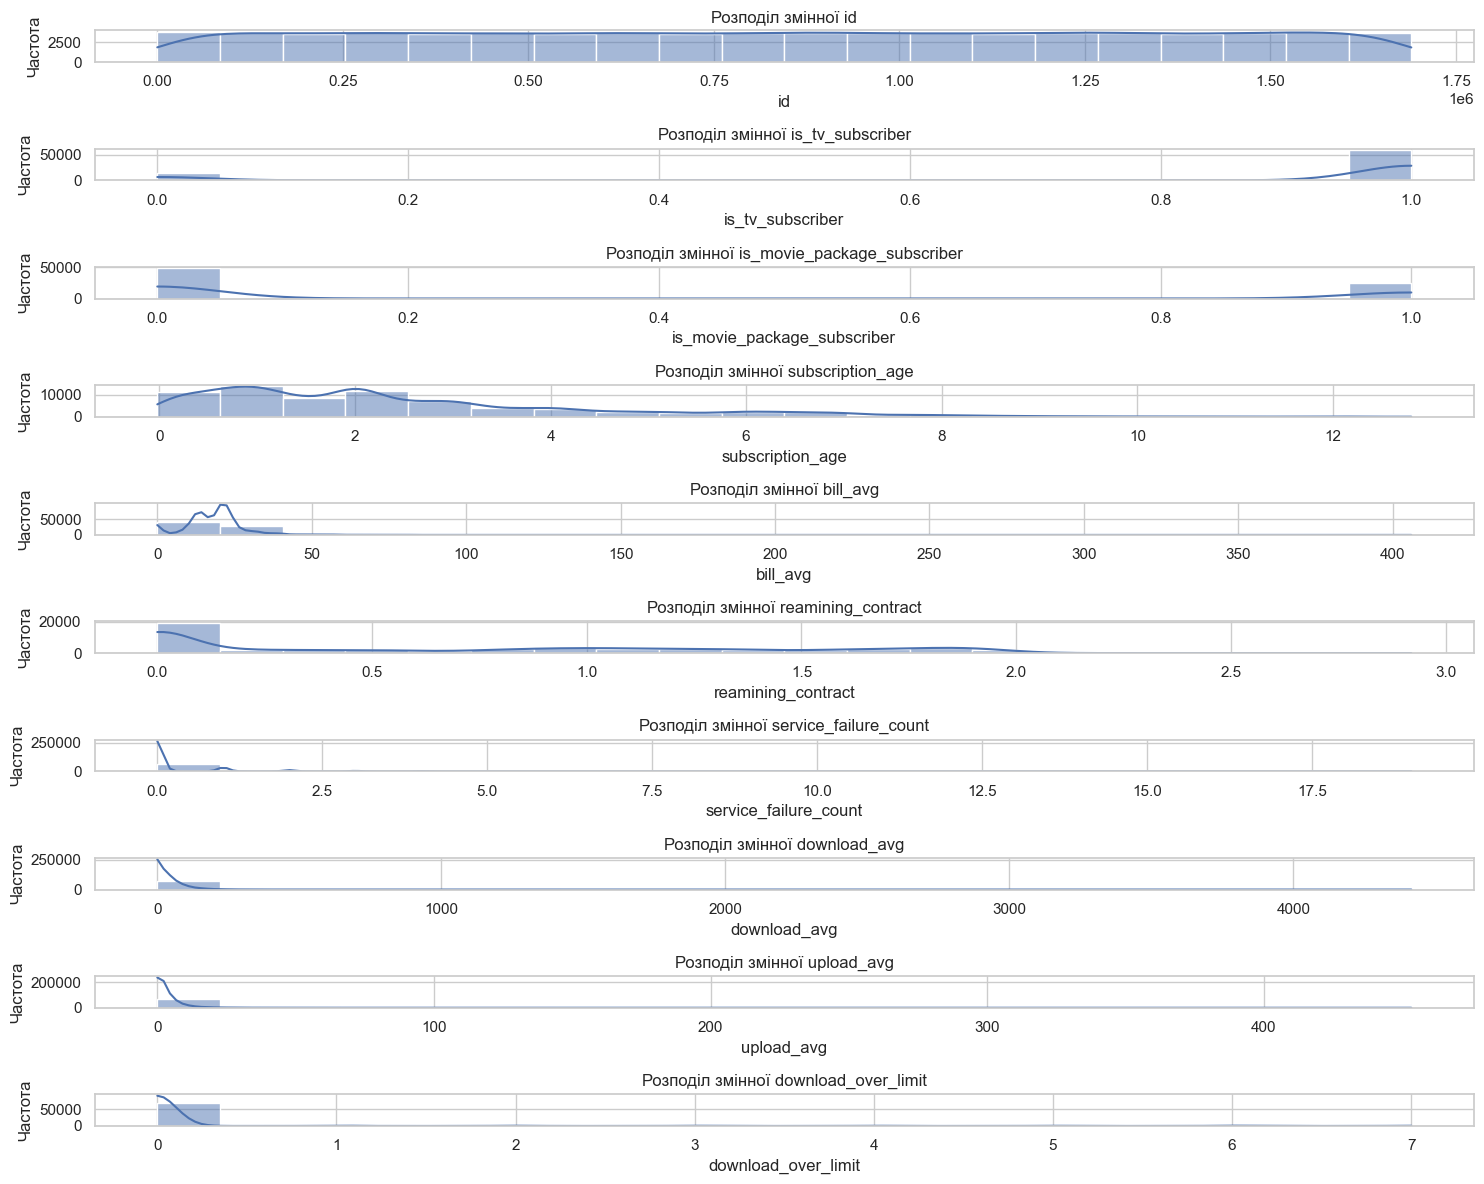

In [22]:

sns.set_theme(style="whitegrid")

# Створення підграфіків для кожної змінної
num_vars = df.select_dtypes(include=['float64', 'int64']).columns
num_vars = [var for var in num_vars if var != 'churn']  # Виключення 'churn', якщо потрібно

plt.figure(figsize=(15, 12))

# Розподіл числових змінних
for i, var in enumerate(num_vars):
    plt.subplot(len(num_vars), 1, i + 1)
    sns.histplot(df[var].dropna(), kde=True, bins=20)
    plt.title(f'Розподіл змінної {var}')
    plt.xlabel(var)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [4]:
print("Розмір датасету:", df.shape)

Розмір датасету: (72274, 11)


#### Типи колонок

In [14]:
print(df.dtypes)

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object


#### Перетворення всіх стовпчиків у тип float

In [23]:
df = df.astype(float)
 
print(df.dtypes)

id                             float64
is_tv_subscriber               float64
is_movie_package_subscriber    float64
subscription_age               float64
bill_avg                       float64
reamining_contract             float64
service_failure_count          float64
download_avg                   float64
upload_avg                     float64
download_over_limit            float64
churn                          float64
dtype: object


#### Знайдемо кількість пропусків у кожній колонці

In [5]:
print(df.isna().sum())

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


#### Частка пропусків, що міститься в кожній колонці

In [7]:
missing_values = df.isnull().sum() / len(df)
print(missing_values)

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64


##### Видаляємо рядки, де є пропущені значення в 'download_avg' або 'upload_avg', тому що набір даних великий і втрати цих рядків у кількості 0,5% не вплинуть на загальну картину.

In [17]:
df_cleaned = df.dropna(subset=['download_avg', 'upload_avg'])

#### Перевіряємо кількість пропущених даних після видалення

In [18]:
missing_values_new = df_cleaned.isnull().sum() / len(df)
print(missing_values_new)

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.297728
service_failure_count          0.000000
download_avg                   0.000000
upload_avg                     0.000000
download_over_limit            0.000000
churn                          0.000000
dtype: float64


#### Ми бачимо, що reamining_contract має значну частку пропусків, близько 30%. Для того, щоб прийняти рішення,чи залишати reamining_contract при подальшому аналізі треба дізнатися, як сильно reamining_contract впливає на churn. Для цього роздивимося матрицю кореляції.

id                            -0.448660
is_tv_subscriber              -0.329417
is_movie_package_subscriber   -0.307789
subscription_age              -0.126672
bill_avg                      -0.027550
reamining_contract            -0.624719
service_failure_count          0.019680
download_avg                  -0.298063
upload_avg                    -0.162690
download_over_limit            0.157626
churn                          1.000000
Name: churn, dtype: float64


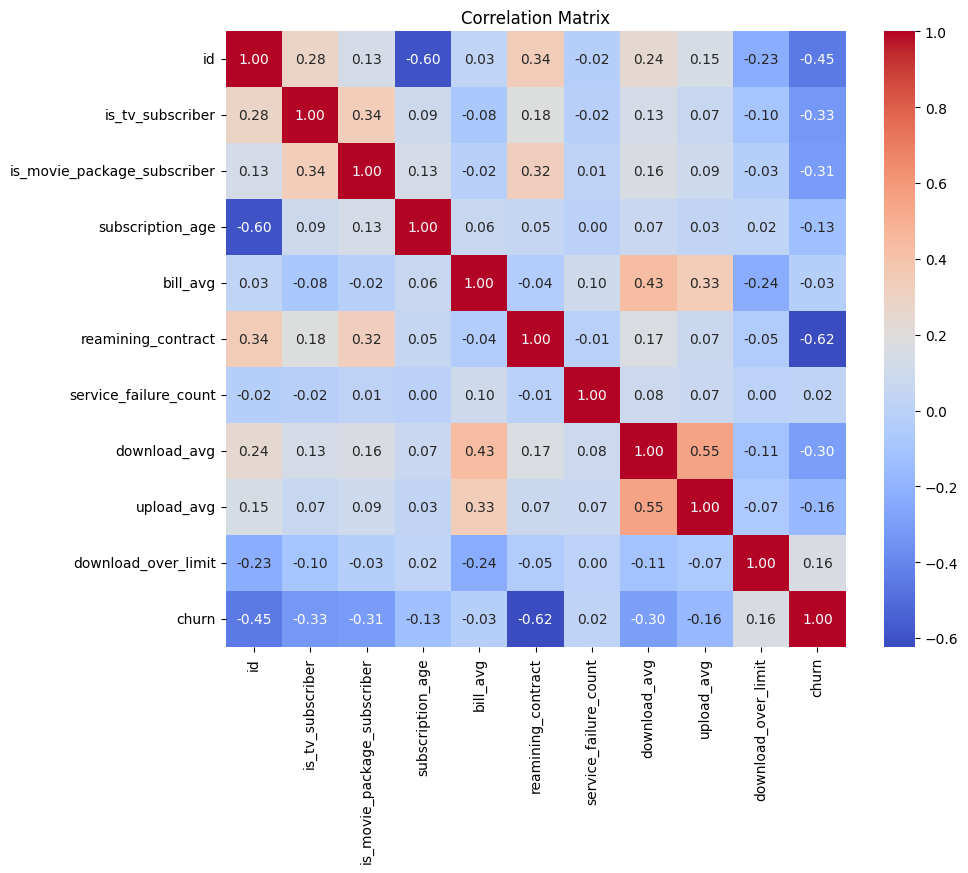

In [20]:
# Розрахунок матриці кореляції
correlation_matrix = df_cleaned.corr()

# Виведення кореляції для 'churn'
print(correlation_matrix['churn'])

# Візуалізація матриці кореляції за допомогою heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### З отриманих даних видно кореляцію між змінними та відтоком клієнтів ("churn"). Ось що можна сказати про кожну з них:

- id: -0.448660
Однак "id" не є суттєвою змінною для аналізу, і в подальшому, при обробці даних, цей стовпчик має бути видалений.
- is_tv_subscriber: -0.329417
Негативна кореляція з "churn" означає, що клієнти, які підписані на телевізійний пакет, мають меншу ймовірність відтоку. Тобто, ймовірно, клієнти, які підписані на телевізійний пакет, менш схильні до відходу.
- is_movie_package_subscriber: -0.307789
Подібно до попереднього пункту, негативна кореляція вказує на те, що клієнти, які підписані на пакет фільмів, також мають меншу ймовірність відтоку. Це може свідчити про те, що клієнти з додатковими пакетами менше схильні до відходу.
- subscription_age: -0.126672
Зменшення ймовірності відтоку з віком підписки є слабким. Це означає, що немає значного впливу віку підписки на ймовірність відтоку.
- bill_avg: -0.027550
Кореляція дуже близька до нуля, що вказує на те, що середній рахунок має дуже слабкий зв'язок з відтоком клієнтів.
- remaining_contract: -0.624719
Це значення вказує на помірний негативний зв'язок з відтоком клієнтів. Збільшення залишкових термінів контракту пов'язане з меншим ймовірністю відтоку. Клієнти, які мають довший залишок контракту, ймовірно, менш схильні до відходу.
- service_failure_count: 0.019680
Дуже слабка позитивна кореляція. Кількість збоїв у службі майже не впливає на ймовірність відтоку.
- download_avg: -0.298063
Негативна кореляція з "churn" показує, що більше завантажень може бути пов'язане з меншим ймовірністю відтоку, але зв'язок є помірним.
- upload_avg: -0.162690
Негативна кореляція, але досить слабка. Більше завантажень також може бути пов'язане з меншим відтоком, але цей зв'язок слабший.
- download_over_limit: 0.157626
Позитивна кореляція, яка вказує на те, що перевищення ліміту завантаження може бути пов'язане з більшим ймовірним відтоком клієнтів. Це може означати, що клієнти, які часто перевищують ліміти, більш схильні до відходу.

#### Висновок: Найсильніший негативний зв'язок з відтоком спостерігається для змінної "remaining_contract". Це вказує на те, що залишковий термін контракту є важливим фактором для утримання клієнтів. Інші змінні, такі як "is_tv_subscriber" і "is_movie_package_subscriber", також мають негативний зв'язок, що вказує на те, що підписки на різні пакети можуть допомогти знизити ймовірність відтоку.

#### Зміни у середньому рахунку ("bill_avg") та кількість збоїв у службі ("service_failure_count") мають дуже слабкий вплив на відтік клієнтів.

#### Зважаючи на те, що reamining_contract має найбільший вплив на churn поміж усіх інших фічей, розуміємо,що ми не можемо просто видалити цю фічу. Тож подивимося, чи можемо ми заповнити втраченні данні середніми медіанними, а це можливо лише у випадку нормального розподілу данних.

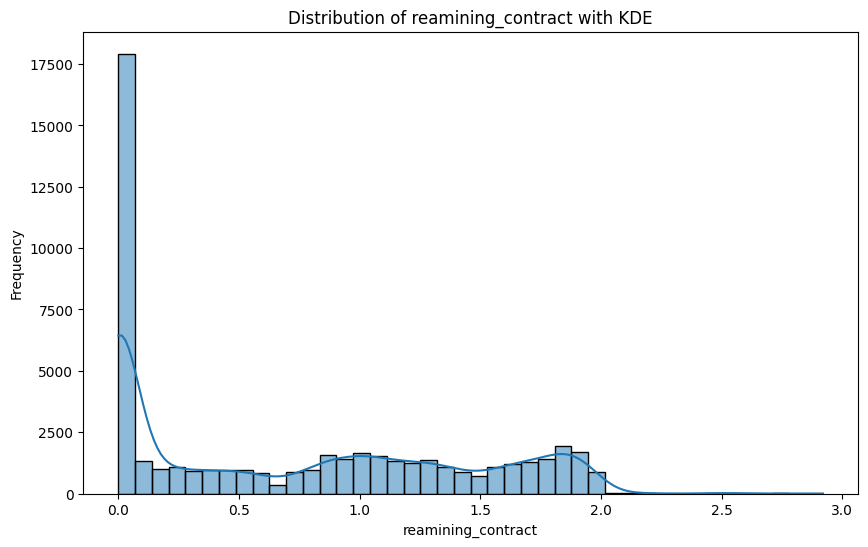

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['reamining_contract'].dropna(), kde=True)
plt.title('Distribution of reamining_contract with KDE')
plt.xlabel('reamining_contract')
plt.ylabel('Frequency')
plt.show()

#### Нажаль ми не маємо нормального розподілу даних, то не можемо заповнити втраченні данні середніми медіанними. Але зважаючи на те, що reamining_contract є важливою для аналізу, вона може бути конвертована в категоріальну і для неї можна створити окрему категорію, яка позначатиме відсутність значення.